# Convert and view Lignum XML files

In [1]:
%pylab inline
%gui qt
from vpltkdisplay import PlantGL

Populating the interactive namespace from numpy and matplotlib
PyQt4 used: your application or derivative works must be released under GPL or CeCILL license !


In [2]:
import lignum
from lignum.io import xml2mtg, mtg2xml, lignum_turtle
from openalea.mtg import *
from openalea.plantgl.all import Viewer, Scene

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The matplotlib.mpl module was deprecated in version 1.3. Use `import matplotlib as mpl` instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [4]:
from openalea.deploy import shared_data
file_names = shared_data.shared_data(lignum,share_path="../../share/stump2", pattern='Growth*.xml')
print file_names

[path(u'/Users/pradal/devlp/git/lignum/share/stump2/GrowthStep--Split--Stump-0-1---out-1.xml'), path(u'/Users/pradal/devlp/git/lignum/share/stump2/GrowthStep--Split--Stump-1-29---out-29.xml'), path(u'/Users/pradal/devlp/git/lignum/share/stump2/GrowthStep--Split--Stump-10-74---out-74.xml'), path(u'/Users/pradal/devlp/git/lignum/share/stump2/GrowthStep--Split--Stump-2-56---out-56.xml'), path(u'/Users/pradal/devlp/git/lignum/share/stump2/GrowthStep--Split--Stump-3-57---out-57.xml'), path(u'/Users/pradal/devlp/git/lignum/share/stump2/GrowthStep--Split--Stump-4-58---out-58.xml'), path(u'/Users/pradal/devlp/git/lignum/share/stump2/GrowthStep--Split--Stump-5-62---out-62.xml'), path(u'/Users/pradal/devlp/git/lignum/share/stump2/GrowthStep--Split--Stump-6-63---out-63.xml'), path(u'/Users/pradal/devlp/git/lignum/share/stump2/GrowthStep--Split--Stump-7-64---out-64.xml'), path(u'/Users/pradal/devlp/git/lignum/share/stump2/GrowthStep--Split--Stump-8-67---out-67.xml'), path(u'/Users/pradal/devlp/git

## Reading xml file

In [5]:
gs = []
scenes = []
for fn in file_names:
    g = xml2mtg(fn)
    gs.append(g)
    scenes.append(lignum_turtle(g))

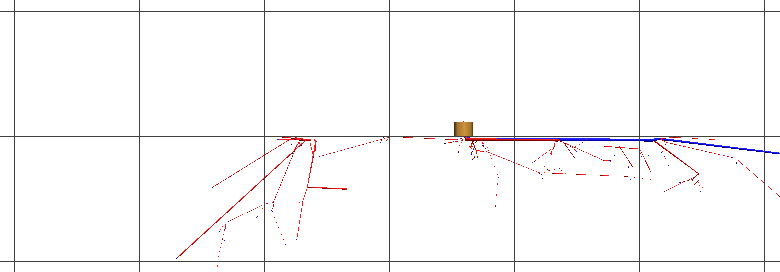

In [6]:
PlantGL(scenes[10])

In [6]:
# Compute the property
for g in gs:
    p = set(g.property('LGAtype').values())
    print p

set([0, 1, 2])
set([0, 1, 2])
set([0, 1])
set([0, 1, 2])
set([0, 1])
set([0, 1])
set([0, 1, 2])
set([0, 1])
set([0, 1])
set([0, 1])
set([0, 1])


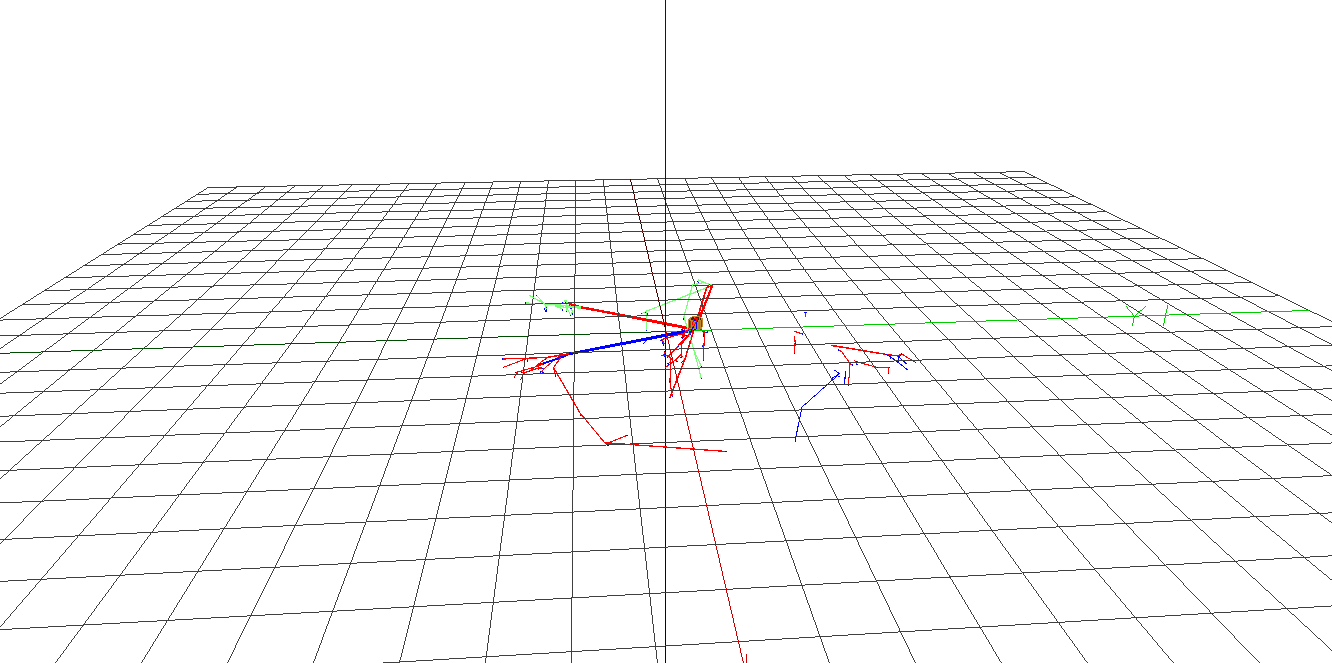

In [8]:
from openalea.mtg.plantframe import color

g = xml2mtg(file_names[0])

def compute_color(g, cmap='jet', lognorm=False):
    
    if not 'LGAtype' in g.properties():
        return
    p = g.property('LGAtype')
    keys = p.keys()
    vs = p.values()


    if vs and isinstance(vs[0], str):
        try:
            values = np.array(vs,dtype='int')
        except ValueError:
            values = np.array(vs,dtype='float')
        g.properties()['LGAtype'] = dict(zip(keys, values))

    color.colormap(g, 'LGAtype', cmap=cmap, lognorm=lognorm)
    return g


g = compute_color(g,cmap='jet',lognorm=False)
#color.colorbar(g,'LGAtype',cmap='jet', lognorm=False)
#color.colorbar_lut(g,'LGAtype')

scene = lignum_turtle(g)
PlantGL(scene)

In [9]:
set(g.property('LGAtype').values())

{0, 1, 2}

In [10]:
lut = {}
lut[0] = (255, 110,50)
lut[1] = (0,255,0)
lut[2] = (0,0,255)
for g in gs:
    ct = g.property('LGAtype')
    _colors = dict((v, lut.get(x,(0,127,127))) for v, x in ct.iteritems())
    g.properties()['color'] = _colors

In [17]:
scenes = []
i= 0
for g in gs:
    scene = lignum_turtle(g, has_color=True)
    print i, len(scene)
    i+=1
    scenes.append(scene)
#map(lambda g: lignum_turtle(g, has_color=True), gs)
print scenes
print gs


0 267
1 279
2 261
3 236
4 523
5 207
6 379
7 279
8 285
9 157
10 240
[<openalea.plantgl.scenegraph._pglsg.Scene object at 0x11c0df838>, <openalea.plantgl.scenegraph._pglsg.Scene object at 0x11c0df890>, <openalea.plantgl.scenegraph._pglsg.Scene object at 0x11c0df940>, <openalea.plantgl.scenegraph._pglsg.Scene object at 0x11c0df9f0>, <openalea.plantgl.scenegraph._pglsg.Scene object at 0x11c0df998>, <openalea.plantgl.scenegraph._pglsg.Scene object at 0x11c0dfc58>, <openalea.plantgl.scenegraph._pglsg.Scene object at 0x11c0dfc00>, <openalea.plantgl.scenegraph._pglsg.Scene object at 0x11c0dfba8>, <openalea.plantgl.scenegraph._pglsg.Scene object at 0x11c0dfb50>, <openalea.plantgl.scenegraph._pglsg.Scene object at 0x11c0dfd08>, <openalea.plantgl.scenegraph._pglsg.Scene object at 0x11c0dfcb0>]
[<openalea.mtg.mtg.MTG object at 0x115092e10>, <openalea.mtg.mtg.MTG object at 0x11b950490>, <openalea.mtg.mtg.MTG object at 0x11c3eb8d0>, <openalea.mtg.mtg.MTG object at 0x11bc30dd0>, <openalea.mtg.mtg.MTG

In [19]:
#scene = reduce(lambda x, y: x.merge(y), scenes, Scene())
scene = Scene()
for sc in scenes:
    scene.merge(sc)

In [29]:
scene = Scene()
for s in scenes:
    scene.merge(s)

In [21]:
len(scene)

3113

In [22]:
Viewer.display(scene)

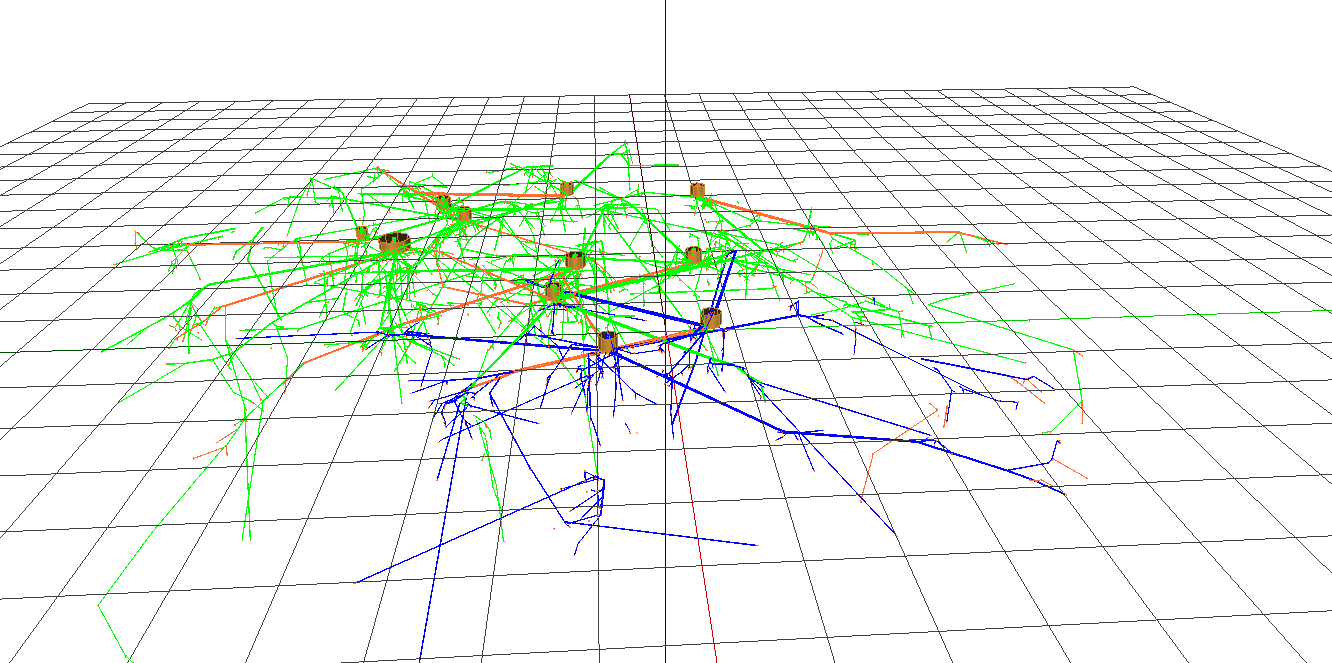

In [23]:
PlantGL(scene)

In [9]:
g0, g1, g2, g3, g4, g5, g6, g7, g8, g9, g10=gs


In [10]:
g0.property_names()

['LGPrhoW',
 'LGPsf',
 'LGAvi',
 'point',
 'color',
 'LGAcollision',
 'LGAQabs',
 'LGPyc',
 'edge_type',
 'LGAQin',
 'LGAR',
 'LGAtype',
 'LGPaleafmax',
 'LGAVf',
 'LGAL',
 'LGPrho_root',
 'LGPms',
 'LGPmr',
 'LGPdof',
 'LGAstate',
 'LGPar',
 'LGAstatus',
 'LGADbh',
 'label',
 'LGPmf',
 'LGAHf',
 'LGPrho_hair',
 'LGAWf0',
 'SegmentType',
 'LGAomega',
 'LGPaf',
 'direction',
 'LGARTop',
 'LGAip',
 'LGPtauL',
 'LGPLmin',
 'LGARh',
 'LGAstarm',
 'LGPxi',
 'LGPapical',
 'LGADbhHw',
 'LGPq',
 'LGAWh',
 'LGPlr',
 'LGADbase',
 'ObjectIndex',
 'LGPnl',
 'LGADbaseHw',
 'LGAage',
 'LGPna',
 'LGAP',
 'LGAWf',
 'LGPpr',
 'LGAM',
 'LGAsf',
 'LGAH',
 'LGARf',
 'LGAWs',
 'LGPzbrentEpsilon',
 'LGPss',
 'LGPsr']